### **ESTRATEGIAS DE MUESTREO EN MODELOS DE CLASIFICACION DESBALANCEADOS**


### **1.Instalación de Librerias**



In [49]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

### **2.Importación del caso de negocio**

In [50]:
data = pd.read_csv('2_DS_train_enf_corazon.csv')

### **3. Exploracion de datos**

In [51]:
# Exploracion inicial
data.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Promedio_nivel_glucosa,IMC,Flag_fumador,Ataque_cardiaco
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,95.12,18.0,NaN,0
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,87.96,39.2,Nunca_fuma,0
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,110.89,17.6,NaN,0
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,69.04,35.9,antes_fumaba,0
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,161.28,19.1,NaN,0


In [52]:
data.columns

Index(['ID', 'Genero', 'Edad', 'Flag_hipertension', 'Flag_problem_cardiaco',
       'Estados_civil', 'Tipo_trabajo', 'Zona_residencia',
       'Promedio_nivel_glucosa', 'IMC', 'Flag_fumador', 'Ataque_cardiaco'],
      dtype='object')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      43400 non-null  int64  
 1   Genero                  43400 non-null  object 
 2   Edad                    43400 non-null  float64
 3   Flag_hipertension       43400 non-null  int64  
 4   Flag_problem_cardiaco   43400 non-null  int64  
 5   Estados_civil           43400 non-null  object 
 6   Tipo_trabajo            43400 non-null  object 
 7   Zona_residencia         43400 non-null  object 
 8   Promedio_nivel_glucosa  43400 non-null  float64
 9   IMC                     41938 non-null  float64
 10  Flag_fumador            30108 non-null  object 
 11  Ataque_cardiaco         43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [54]:
# Revision de la vriables individuales
data.describe()

,ID,Edad,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,IMC,Ataque_cardiaco
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [55]:
# Dimensiones de la tabla de modelamiento (fila, Columna)
data.shape

(43400, 12)

In [56]:
# Detección del desbalance de la muestras
data.groupby('Ataque_cardiaco').size()

Ataque_cardiaco
0    42617
1      783
dtype: int64

Class 0 Sano: 42617
Class 1 Ataque: 783
Proporción: 54.43 : 1


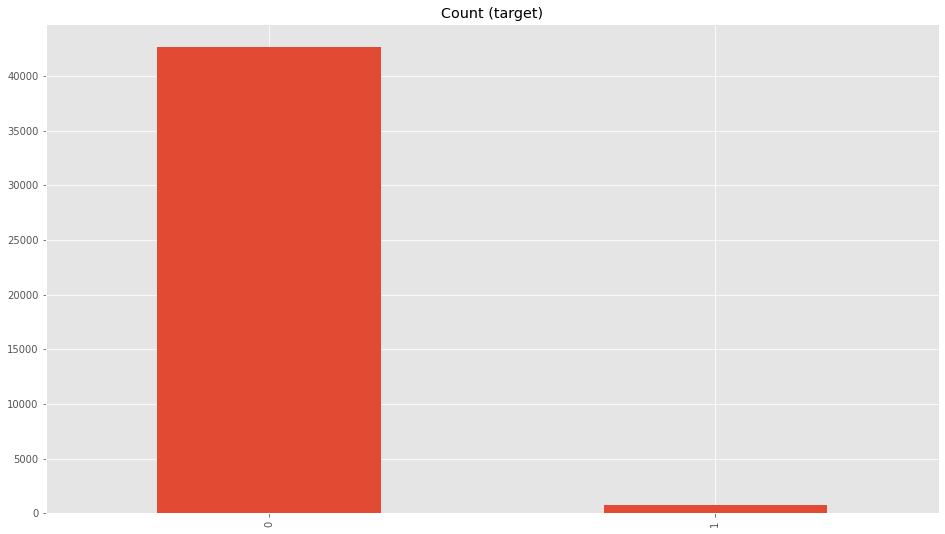

In [57]:
# Detección del desbalance de la muestras
target_count = data.Ataque_cardiaco.value_counts()
print('Class 0 Sano:', target_count[0])
print('Class 1 Ataque:', target_count[1])
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

### **4. Separando una muestra para verificar resultado de estrategias de muestreo**

In [58]:
data.columns

Index(['ID', 'Genero', 'Edad', 'Flag_hipertension', 'Flag_problem_cardiaco',
       'Estados_civil', 'Tipo_trabajo', 'Zona_residencia',
       'Promedio_nivel_glucosa', 'IMC', 'Flag_fumador', 'Ataque_cardiaco'],
      dtype='object')

In [59]:
# Seleccionaremos un 35% de los datos para estrudiar el beneficio de las estretgias de muestreo

X = data[['Edad','Flag_hipertension','Flag_problem_cardiaco','Promedio_nivel_glucosa']]
y = data[['Ataque_cardiaco']]

#np.random.seed(101)
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)

### **5. Estrategias de Muestreo Oversampling y Under Sampling**


In [60]:
# Solo utilizaremos Datos de entrenamiento para la estrategia 
df_train = pd.concat([X_train,y_train],axis=1)

In [61]:
df_train

,Edad,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,Ataque_cardiaco
20930,17.0,0,0,82.67,0
23510,41.0,0,0,115.09,0
18212,73.0,1,0,95.37,0
31446,17.0,0,0,55.03,0
12598,17.0,0,0,62.94,0
...,...,...,...,...,...
12363,81.0,0,0,91.37,0
5695,12.0,0,0,73.84,0
8006,33.0,0,0,141.89,0
17745,54.0,0,0,73.01,0


In [62]:
#División entre clientes que sufrieron o no el infarto
count_class_0, count_class_1 = df_train.Ataque_cardiaco.value_counts()

# Divide by class
df_class_0 = df_train[df_train['Ataque_cardiaco'] == 0]
df_class_1 = df_train[df_train['Ataque_cardiaco'] == 1]

In [63]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(27709, 27709, 501, 501)

**UnderSampling**

In [64]:
df_class_0.sample(3)

,Edad,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,Ataque_cardiaco
26993,5.00,0,0,65.35,0
26631,0.32,0,0,84.26,0
10511,61.00,1,0,270.59,0


Estrategia de Muestreo under-sampling:
1    501
0    501
Name: Ataque_cardiaco, dtype: int64


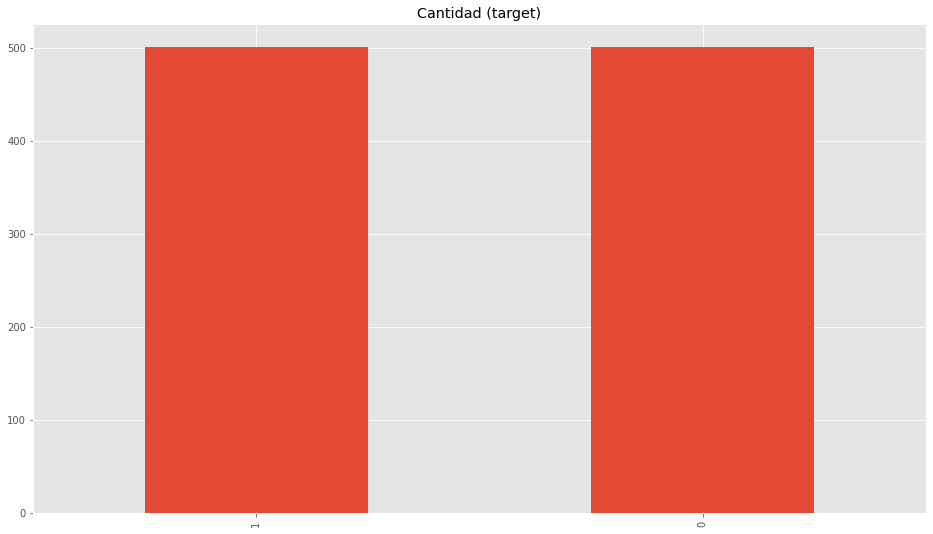

In [65]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Estrategia de Muestreo under-sampling:')
print(df_test_under.Ataque_cardiaco.value_counts())

df_test_under.Ataque_cardiaco.value_counts().plot(kind='bar', title='Cantidad (target)');

**OverSampling**

In [66]:
aux = df_class_1.head(2)
aux.sample(4,replace=True)

,Edad,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,Ataque_cardiaco
34617,52.0,0,0,100.51,1
34617,52.0,0,0,100.51,1
34617,52.0,0,0,100.51,1
34617,52.0,0,0,100.51,1


Random over-sampling:
1    27709
0    27709
Name: Ataque_cardiaco, dtype: int64


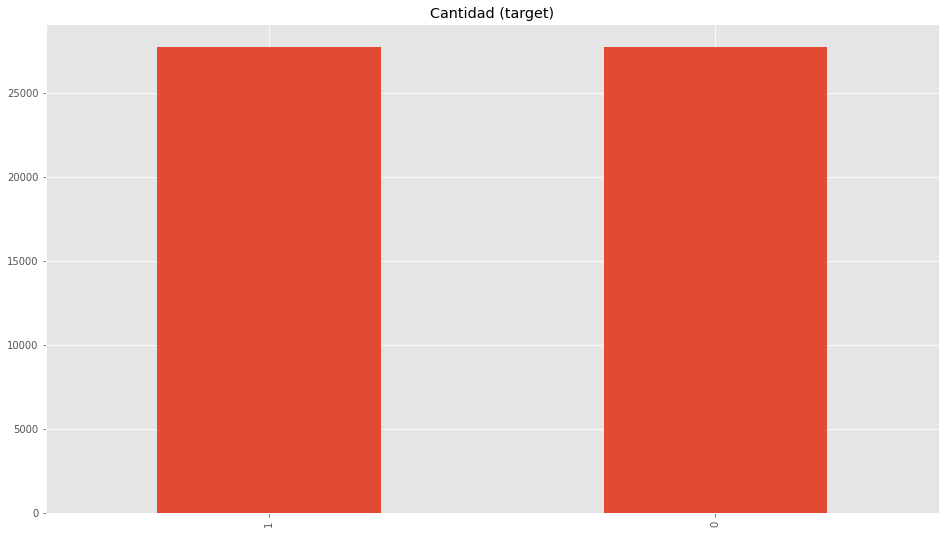

In [67]:
# hay un riesgo de que algunas filas no sean consideradas porque la aletoriedad las ignorara
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Ataque_cardiaco.value_counts())

df_test_over.Ataque_cardiaco.value_counts().plot(kind='bar', title='Cantidad (target)');

**6.Evaluación de resultados de las estrategias de muestreo**

# Modelo de Clasificación utilizado es el arbol, es posible utilizar otros modelo de clasificación revisar en la parte final


**DATOS ORIGINALES**

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 96.67%
Log Loss: 1.1505473573668812


Confusion matrix DATOS ORIGINALES:
 [[14666   242]
 [  264    18]]


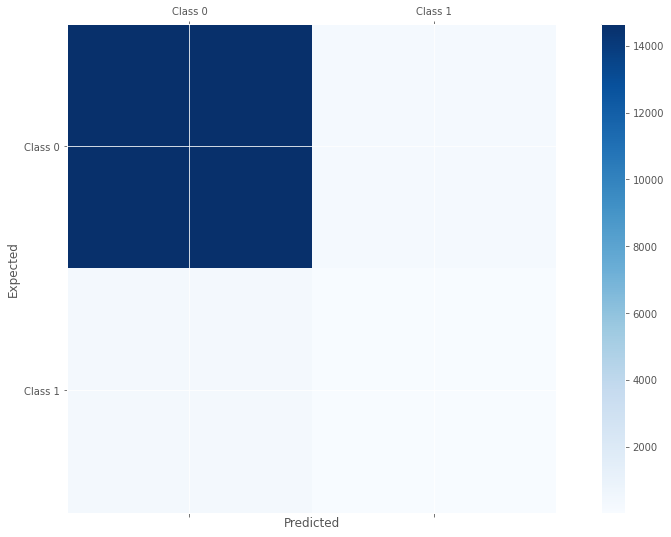

In [69]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Confusion matrix DATOS ORIGINALES:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

**UNDER SAMPLING**

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_u= df_test_under[['Edad','Flag_hipertension','Flag_problem_cardiaco','Promedio_nivel_glucosa']]
y_train_u = df_test_under[['Ataque_cardiaco']]

model.fit(X_train_u, y_train_u)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy UNDERSAMPLING: 68.12%
Log Loss: 11.012184711755525


Confusion matrix UNDERSAMPLING:
 [[10166  4742]
 [  101   181]]


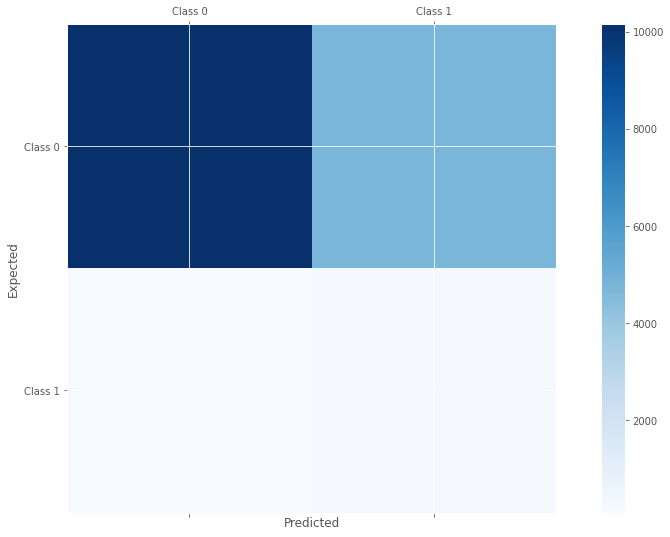

In [71]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Confusion matrix UNDERSAMPLING:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

**OVER SAMPLING**

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

X_train_o= df_test_over[['Edad','Flag_hipertension','Flag_problem_cardiaco','Promedio_nivel_glucosa']]
y_train_o = df_test_over[['Ataque_cardiaco']]

model.fit(X_train_o, y_train_o)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING: 96.70%
Log Loss: 1.141451695645094


Confusion matrix UNDERSAMPLING:
 [[14676   232]
 [  270    12]]


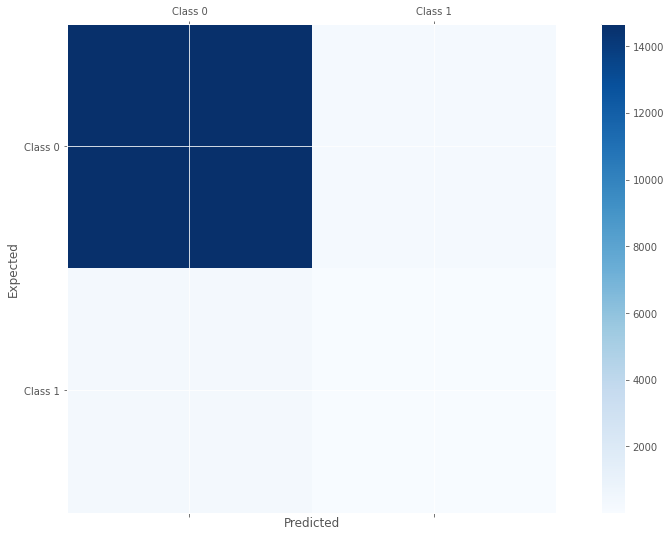

In [73]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Confusion matrix UNDERSAMPLING:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Es posible utilizar otros modelo de clasificación 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier

# Referencias de investigación
# https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets